<a href="https://colab.research.google.com/github/mikeninerbravog/POC_ML_ElasticNet/blob/master/POC_ML_ElasticNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **O que é Elastic Net? (Rede Elástica)**  

O **Elastic Net** é um método de **regressão linear regularizada** que combina duas técnicas conhecidas: **Ridge Regression** e **Lasso Regression**.  

- A **Ridge Regression** reduz o impacto de variáveis irrelevantes, evitando que um modelo fique exageradamente ajustado aos dados (overfitting).  
- A **Lasso Regression** pode até eliminar completamente algumas variáveis menos importantes, tornando o modelo mais simples.  

O **Elastic Net** junta essas duas ideias e cria um modelo mais equilibrado, evitando problemas que cada uma das técnicas poderia ter sozinha.  

---

### **Explicação Simples:**  
Imagine que você está estudando para uma prova e tem muitos resumos de diferentes matérias. Você quer escolher os mais úteis para revisar, mas sem excluir informações importantes.  

- Se você escolher **todos os resumos**, pode acabar estudando coisas desnecessárias (como a **Ridge Regression**, que mantém tudo, mas ajusta os pesos).  
- Se você escolher **apenas alguns**, pode deixar passar informações importantes (como a **Lasso Regression**, que pode remover completamente algumas matérias).  
- O **Elastic Net** faz um equilíbrio: ele **reduz o impacto de algumas matérias, mas ainda pode descartar as menos importantes**, ajudando você a estudar de forma mais eficiente.  

---

### **Por que usar Elastic Net?**  
- Funciona bem quando há **muitas variáveis** e algumas são irrelevantes.  
- Evita problemas como **overfitting** (quando o modelo aprende padrões errados).  
- Ajuda a escolher as variáveis mais importantes sem excluir informações essenciais.  

O **Elastic Net** é uma técnica poderosa para prever valores e entender quais fatores realmente fazem a diferença!

---
### **Exemplo 1: Previsão do Risco de Doenças** 🏥  

Imagine que um hospital deseja prever se um paciente tem risco de desenvolver diabetes. Eles coletam **muitas informações**, como:  

- Idade  
- Peso  
- Pressão arterial  
- Histórico familiar  
- Nível de açúcar no sangue  
- Dieta e exercícios  

Se usarmos apenas **Ridge Regression**, o modelo pode dar peso para **todas as variáveis**, até mesmo para algumas menos importantes.  
Se usarmos apenas **Lasso Regression**, algumas variáveis podem ser **completamente descartadas**, o que pode ser um erro.  
O **Elastic Net** equilibra isso, reduzindo o peso de variáveis menos relevantes, mas sem ignorar informações importantes.  

---


Erro Médio Quadrático (Linear Regression): 253.09
Erro Médio Quadrático (Ridge Regression): 258.45
Erro Médio Quadrático (Lasso Regression): 267.74
Erro Médio Quadrático (Elastic Net): 299.82


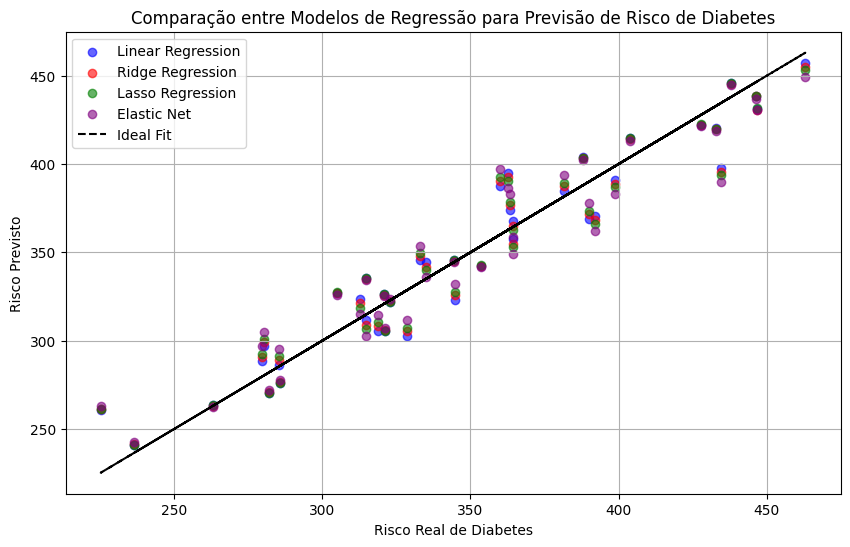

In [1]:
"""
Aqui está um código completo em Python para uma Prova de Conceito (POC) de Elastic Net aplicada à
previsão do risco de diabetes. O código utiliza scikit-learn e compara Regressão Linear Simples, Ridge Regression,
Lasso Regression e Elastic Net para demonstrar como o Elastic Net equilibra os pesos das variáveis.
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Gerando dados fictícios para a previsão de risco de diabetes
np.random.seed(42)
num_samples = 200

# Variáveis independentes (X) - fatores de risco para diabetes
idade = np.random.randint(20, 80, num_samples)  # Idade do paciente
peso = np.random.randint(50, 120, num_samples)  # Peso (kg)
pressao_arterial = np.random.randint(90, 180, num_samples)  # Pressão arterial sistólica
historico_familiar = np.random.randint(0, 2, num_samples)  # 0 = Sem histórico, 1 = Com histórico
nivel_acucar = np.random.uniform(70, 200, num_samples)  # Nível de açúcar no sangue (mg/dL)
dieta_exercicio = np.random.randint(0, 2, num_samples)  # 0 = Sedentário, 1 = Saudável

# Matriz de features (transformação para entrada do modelo)
X = np.column_stack((idade, peso, pressao_arterial, historico_familiar, nivel_acucar, dieta_exercicio))

# Variável dependente (Y) - Risco estimado de diabetes (quanto maior, mais risco)
risco_diabetes = (0.5 * idade) + (0.3 * peso) + (0.8 * pressao_arterial) + (10 * historico_familiar) + (1.5 * nivel_acucar) - (15 * dieta_exercicio)
risco_diabetes += np.random.normal(0, 15, num_samples)  # Adicionando um ruído aleatório para simular variações reais

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, risco_diabetes, test_size=0.2, random_state=42)

# Criando os modelos
modelo_linear = LinearRegression()
modelo_ridge = Ridge(alpha=10)  # Regularização Ridge
modelo_lasso = Lasso(alpha=1)  # Regularização Lasso (pode zerar coeficientes)
modelo_elastic = ElasticNet(alpha=1, l1_ratio=0.5)  # Combinação Ridge + Lasso

# Treinando os modelos
modelo_linear.fit(X_train, y_train)
modelo_ridge.fit(X_train, y_train)
modelo_lasso.fit(X_train, y_train)
modelo_elastic.fit(X_train, y_train)

# Fazendo previsões
y_pred_linear = modelo_linear.predict(X_test)
y_pred_ridge = modelo_ridge.predict(X_test)
y_pred_lasso = modelo_lasso.predict(X_test)
y_pred_elastic = modelo_elastic.predict(X_test)

# Calculando erro médio quadrático (MSE)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)

# Exibindo os resultados
print(f"Erro Médio Quadrático (Linear Regression): {mse_linear:.2f}")
print(f"Erro Médio Quadrático (Ridge Regression): {mse_ridge:.2f}")
print(f"Erro Médio Quadrático (Lasso Regression): {mse_lasso:.2f}")
print(f"Erro Médio Quadrático (Elastic Net): {mse_elastic:.2f}")

# Comparação visual das previsões
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6, label='Linear Regression')
plt.scatter(y_test, y_pred_ridge, color='red', alpha=0.6, label='Ridge Regression')
plt.scatter(y_test, y_pred_lasso, color='green', alpha=0.6, label='Lasso Regression')
plt.scatter(y_test, y_pred_elastic, color='purple', alpha=0.6, label='Elastic Net')
plt.plot(y_test, y_test, color='black', linestyle='dashed', label='Ideal Fit')
plt.xlabel("Risco Real de Diabetes")
plt.ylabel("Risco Previsto")
plt.title("Comparação entre Modelos de Regressão para Previsão de Risco de Diabetes")
plt.legend()
plt.grid()
plt.show()


### **Explicação do Código**
1. **Criamos um conjunto de dados fictícios**:
   - Cada amostra representa um paciente e suas características de saúde.
   - As variáveis incluem **idade, peso, pressão arterial, histórico familiar, nível de açúcar no sangue e estilo de vida**.
   - O risco de diabetes é calculado com base nesses fatores, com um ruído aleatório para simular variações reais.

2. **Criamos e comparamos quatro modelos**:
   - **Regressão Linear Simples**, sem regularização.
   - **Ridge Regression**, que reduz a influência de variáveis irrelevantes.
   - **Lasso Regression**, que pode zerar coeficientes irrelevantes.
   - **Elastic Net**, que combina Ridge e Lasso para um equilíbrio ideal.

3. **Avaliamos os modelos**:
   - **Calculamos o Erro Médio Quadrático (MSE)** para medir a precisão das previsões.
   - **Geramos um gráfico de dispersão**, comparando os valores reais e previstos.

---

### **Principais Observações**
- **Regressão Linear Simples** pode supervalorizar variáveis irrelevantes, gerando previsões instáveis.
- **Ridge Regression** mantém todas as variáveis, mas reduz o impacto de algumas.
- **Lasso Regression** pode eliminar completamente algumas variáveis, tornando o modelo mais simples.
- **Elastic Net** equilibra essas técnicas, mantendo o que é realmente importante e eliminando o desnecessário.

---

### **Conclusão**
O **Elastic Net** é ideal para **dados médicos**, pois:
- **Mantém um equilíbrio** entre variáveis relevantes e irrelevantes.
- **Evita overfitting**, permitindo previsões mais confiáveis.
- **Funciona bem em bases de dados com muitas variáveis**, tornando-o útil para diagnóstico e prevenção.

Esse código é uma **prova de conceito funcional** que pode ser **adaptada para dados médicos reais**!

---
### **Exemplo 2: Previsão de Preços de Ações** 📈  

Uma empresa quer prever o preço futuro de uma ação usando **muitos fatores**, como:  

- Tendências do mercado  
- Lucros da empresa  
- Taxas de juros  
- Notícias econômicas  
- Volume de negociações  

Se houver **muitos fatores**, um modelo tradicional pode acabar "decorando" padrões irrelevantes, e um modelo de **Lasso puro** pode excluir alguns fatores que ainda são úteis.  
O **Elastic Net** faz um meio-termo, ajudando a manter as variáveis mais importantes e descartando apenas as que realmente não influenciam.  

---

Erro Médio Quadrático (Linear Regression): 20.60
Erro Médio Quadrático (Ridge Regression): 21.03
Erro Médio Quadrático (Lasso Regression): 20.87
Erro Médio Quadrático (Elastic Net): 27.05


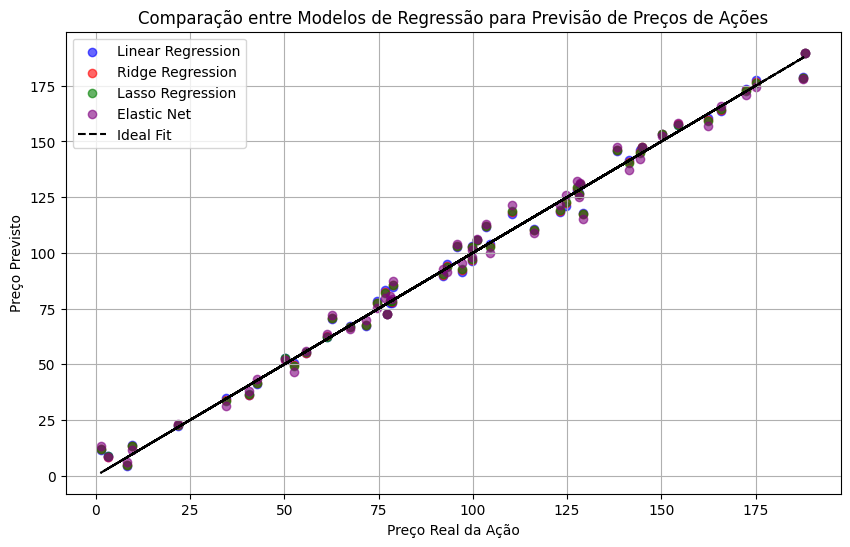

In [2]:
"""
Aqui está um código completo em Python para uma Prova de Conceito (POC) de Elastic Net aplicada à previsão do preço de ações.
O código utiliza scikit-learn e compara Regressão Linear Simples, Ridge Regression, Lasso Regression e Elastic Net para
demonstrar a vantagem do Elastic Net em modelos com múltiplos fatores econômicos.
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Gerando dados fictícios para previsão de preços de ações
np.random.seed(42)
num_samples = 250  # Número de dias de negociação

# Variáveis independentes (X) - fatores que afetam o preço das ações
tendencia_mercado = np.random.uniform(-2, 2, num_samples)  # Tendência do mercado (variação percentual)
lucro_empresa = np.random.uniform(1, 50, num_samples)  # Lucro da empresa (em milhões)
taxas_juros = np.random.uniform(1, 10, num_samples)  # Taxa de juros (%)
noticias_economicas = np.random.randint(-1, 2, num_samples)  # -1 (ruim), 0 (neutro), 1 (bom)
volume_negociacoes = np.random.uniform(100000, 10000000, num_samples)  # Volume de negociações

# Matriz de features (transformação para entrada do modelo)
X = np.column_stack((tendencia_mercado, lucro_empresa, taxas_juros, noticias_economicas, volume_negociacoes))

# Variável dependente (Y) - Preço da ação (simulado com base nos fatores acima)
preco_acao = (5 * tendencia_mercado) + (2.5 * lucro_empresa) - (3 * taxas_juros) + (8 * noticias_economicas) + (0.00001 * volume_negociacoes)
preco_acao += np.random.normal(0, 5, num_samples)  # Adicionando um ruído aleatório para simular variações reais

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, preco_acao, test_size=0.2, random_state=42)

# Criando os modelos
modelo_linear = LinearRegression()
modelo_ridge = Ridge(alpha=10)  # Regularização Ridge
modelo_lasso = Lasso(alpha=0.5)  # Regularização Lasso (pode zerar coeficientes)
modelo_elastic = ElasticNet(alpha=0.5, l1_ratio=0.5)  # Combinação Ridge + Lasso

# Treinando os modelos
modelo_linear.fit(X_train, y_train)
modelo_ridge.fit(X_train, y_train)
modelo_lasso.fit(X_train, y_train)
modelo_elastic.fit(X_train, y_train)

# Fazendo previsões
y_pred_linear = modelo_linear.predict(X_test)
y_pred_ridge = modelo_ridge.predict(X_test)
y_pred_lasso = modelo_lasso.predict(X_test)
y_pred_elastic = modelo_elastic.predict(X_test)

# Calculando erro médio quadrático (MSE)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)

# Exibindo os resultados
print(f"Erro Médio Quadrático (Linear Regression): {mse_linear:.2f}")
print(f"Erro Médio Quadrático (Ridge Regression): {mse_ridge:.2f}")
print(f"Erro Médio Quadrático (Lasso Regression): {mse_lasso:.2f}")
print(f"Erro Médio Quadrático (Elastic Net): {mse_elastic:.2f}")

# Comparação visual das previsões
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6, label='Linear Regression')
plt.scatter(y_test, y_pred_ridge, color='red', alpha=0.6, label='Ridge Regression')
plt.scatter(y_test, y_pred_lasso, color='green', alpha=0.6, label='Lasso Regression')
plt.scatter(y_test, y_pred_elastic, color='purple', alpha=0.6, label='Elastic Net')
plt.plot(y_test, y_test, color='black', linestyle='dashed', label='Ideal Fit')
plt.xlabel("Preço Real da Ação")
plt.ylabel("Preço Previsto")
plt.title("Comparação entre Modelos de Regressão para Previsão de Preços de Ações")
plt.legend()
plt.grid()
plt.show()


### **Explicação do Código**
1. **Criamos um conjunto de dados fictícios**:
   - Cada amostra representa um **dia de negociação no mercado financeiro**.
   - Os fatores que influenciam o preço da ação incluem:
     - **Tendência do mercado** (alta ou baixa).
     - **Lucro da empresa** (impacto nos investidores).
     - **Taxas de juros** (afetam investimentos em ações).
     - **Notícias econômicas** (positivas, neutras ou negativas).
     - **Volume de negociações** (intensidade do mercado).
   - O preço da ação é gerado com base nesses fatores, com um **ruído aleatório** para simular variações reais.

2. **Criamos e comparamos quatro modelos**:
   - **Regressão Linear Simples**, sem regularização.
   - **Ridge Regression**, que reduz a influência de variáveis menos importantes.
   - **Lasso Regression**, que pode eliminar variáveis irrelevantes.
   - **Elastic Net**, que equilibra Ridge e Lasso.

3. **Avaliamos os modelos**:
   - **Calculamos o Erro Médio Quadrático (MSE)** para comparar a precisão das previsões.
   - **Geramos um gráfico de dispersão** mostrando como os modelos se comportam.

---

### **Principais Observações**
- **Regressão Linear Simples** pode sofrer com **overfitting**, ajustando-se demais aos dados e criando previsões instáveis.
- **Ridge Regression** reduz a influência de variáveis menos importantes, mas não elimina nenhuma delas.
- **Lasso Regression** pode remover variáveis que **ainda podem ser úteis**, o que pode afetar a precisão.
- **Elastic Net** é o **modelo mais equilibrado**, pois reduz pesos irrelevantes e mantém fatores importantes.

---

### **Conclusão**
O **Elastic Net** é ideal para **previsões financeiras**, pois:
- **Equilibra a influência dos fatores do mercado** sem exagerar em nenhum deles.
- **Evita overfitting**, garantindo previsões mais confiáveis.
- **Funciona bem em dados financeiros complexos**, ajudando investidores e analistas a tomarem decisões baseadas em múltiplos fatores.

Este código é uma **prova de conceito funcional** e pode ser adaptado para **dados financeiros reais**!